#  Imports

In [57]:
import time

import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import time
import data_processor1 as dp


# Data processing

Importing gpu power data as gpu and total power data as total.

In [13]:
gpu = dp.cleaner('C:/Users/sera/Documents/Project/Data/gpupower.csv') #edit this path
total = pd.read_csv('C:/Users/sera/Documents/Project/Data/totalpower.csv') #edit this path

gpu['Index'] = np.arange(0, len(gpu))
total['Index'] = np.arange(0, len(total))

total.head()

,Unnamed: 0,Watts,Time,Index
0,0,144.937698,9:22:05,0
1,1,122.267563,9:22:06,1
2,2,146.350235,9:22:07,2
3,3,128.479233,9:22:08,3
4,4,192.249176,9:22:09,4


Making a nice line graph of the total power:

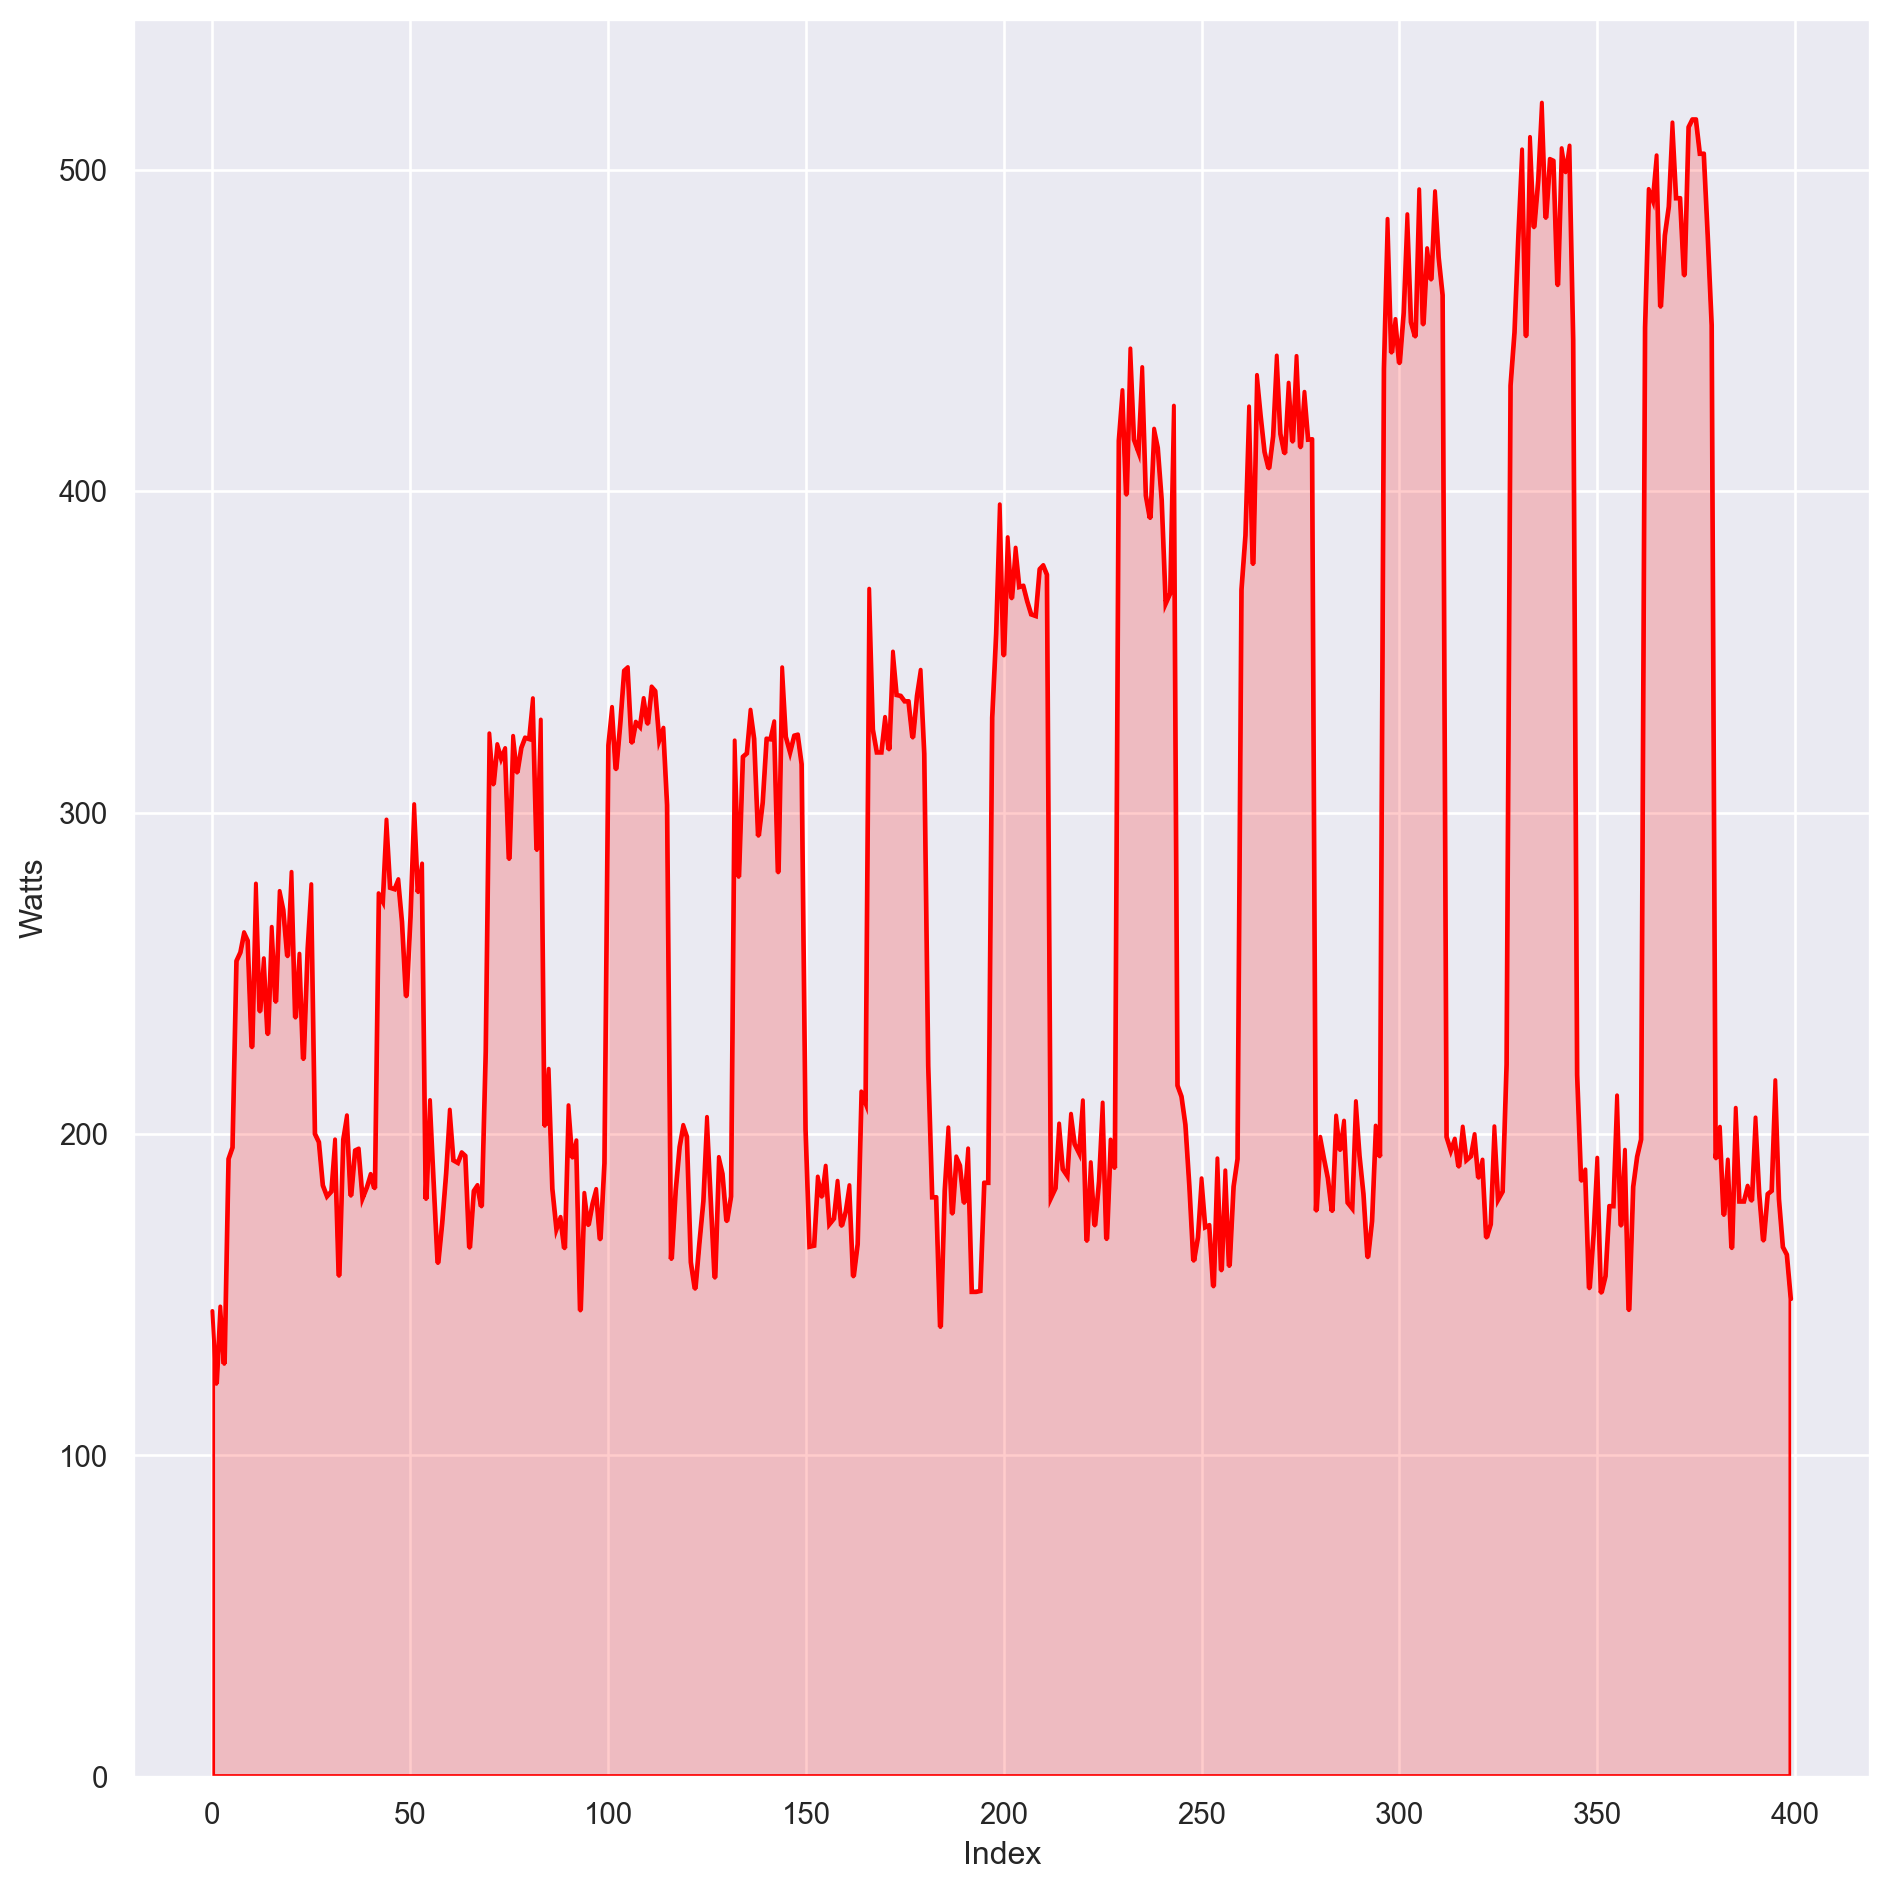

In [4]:
so.Plot(data=total, x='Index', y='Watts').add(so.Lines(color='Red')).limit().add(so.Area(color='Red')).layout(size=(10,10)).save(
    'Data/Total_power_figure').label(
    x = 'Time (s)', y = 'Power (Watts)'
)

Doing the same with gpu power:

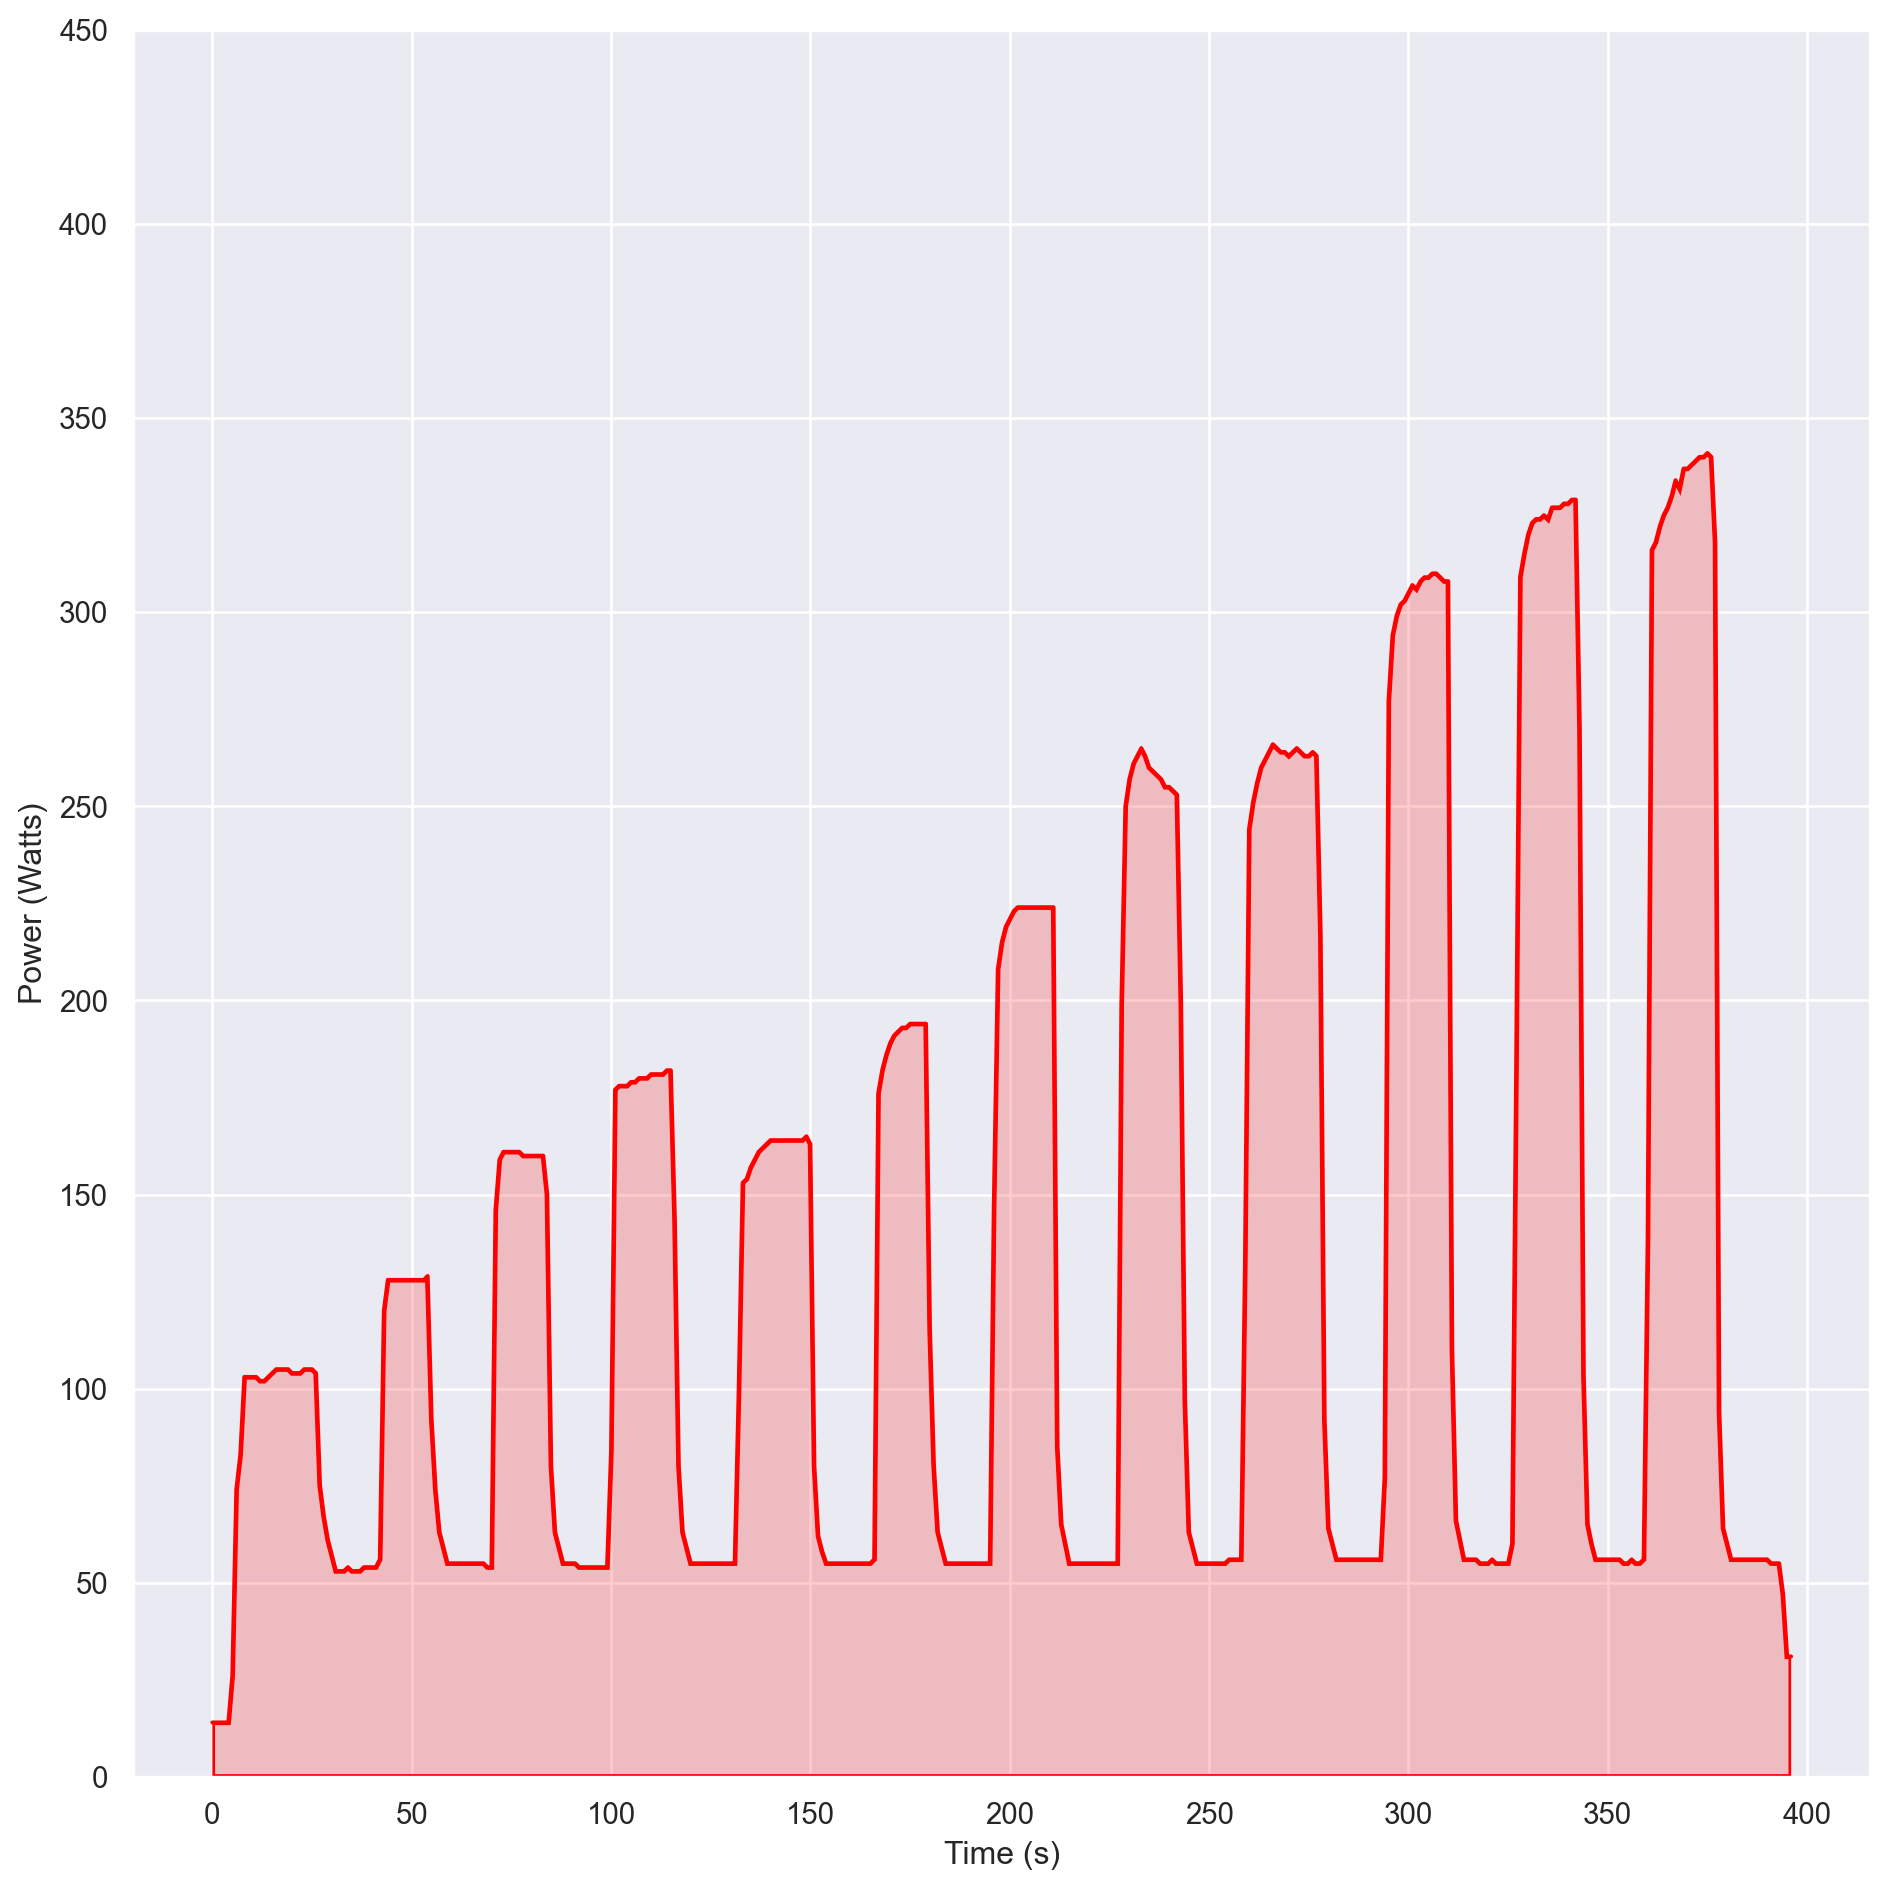

In [6]:
so.Plot(data=gpu, x='Index', y='Power').add(so.Lines(color='Red')).limit(y=(0,450)).add(so.Area(color='Red')).layout(size=(10,10)).save(
    'Data/gpu_power_figure').label(
    x = 'Time (s)', y = 'Power (Watts)'
)

Stacking the graphs to see how much power CPU is consuming: